Data
Data Collection
As part of this Data Science project,my goal is to predict the given species.

In [3]:
!wget https://raw.githubusercontent.com/sebin44/Data_science/main/sample.csv

--2021-07-03 04:19:07--  https://raw.githubusercontent.com/sebin44/Data_science/main/sample.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘sample.csv’

sample.csv          100%[===================>]   3.63K  --.-KB/s    in 0s      

2021-07-03 04:19:07 (44.1 MB/s) - ‘sample.csv’ saved [3716/3716]



In [5]:
!head sample.csv

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [6]:
!tail sample.csv

6.7,3.1,5.6,2.4,virginica
6.9,3.1,5.1,2.3,virginica
5.8,2.7,5.1,1.9,virginica
6.8,3.2,5.9,2.3,virginica
6.7,3.3,5.7,2.5,virginica
6.7,3,5.2,2.3,virginica
6.3,2.5,5,1.9,virginica
6.5,3,5.2,2,virginica
6.2,3.4,5.4,2.3,virginica
5.9,3,5.1,1.8,virginica


In [14]:
import numpy
import pandas
dataframe = pandas.read_csv("sample.csv")
dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
dataframe.shape

(150, 5)

This dataset has data about 150 data. There are 4 features which are made available and there is one Target Variable / Label which will tell us if the species by checking the features.

Exploratory Data Analysis:
Now let us explore the dataset further to understand the features made available to us, identify any potential data quality issues and identify the columns that we will be using for creating out Machine Learning model which will help predict species.

In [9]:
dataframe.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
dataframe.count(axis=0)

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [15]:
dataframe = dataframe[dataframe.notnull()]
dataframe.count(axis=0)

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

The columns 'species' have non-numeric values. Let us convert these to numeric values as well before proceeding further.

In [21]:
dataframe['species'] = dataframe['species'].replace(['setosa','versicolor', 'virginica'],[0,1, 2])
dataframe.count(axis=0)

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [20]:
dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
dataframe['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

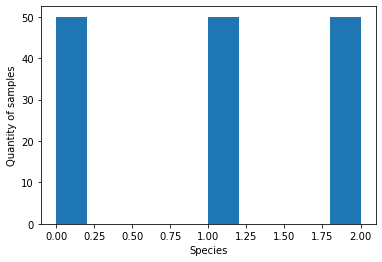

In [24]:
import matplotlib.pyplot as plt
plt.hist(dataframe['species'])
plt.xlabel('Species')
plt.ylabel('Quantity of samples')
plt.show()

Correlation Matrix
Now that we have addressed the data quality issues seen so far, as a next step let us generate a Correlation Matrix to assess the feature quality and the correlation between the features.

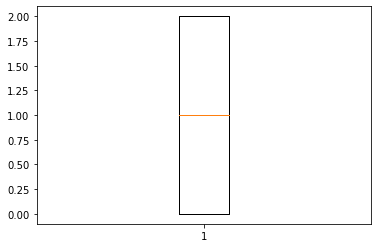

In [37]:
plt.boxplot(dataframe['species'])
plt.show()

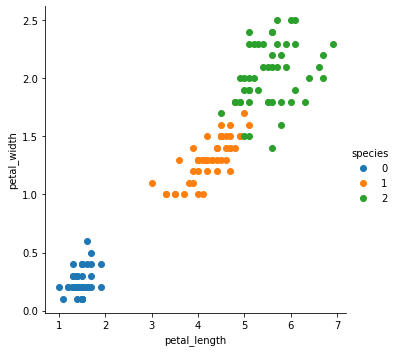

In [38]:
import seaborn as sns

points = sns.FacetGrid(dataframe, hue='species', height=5)
points = (points.map(plt.scatter, 'petal_length', 'petal_width').add_legend())

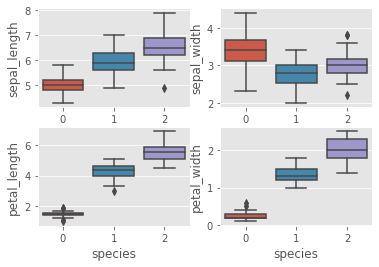

In [39]:
plt.style.use('ggplot')

plt.subplot(2,2,1)
sns.boxplot(x='species', y='sepal_length', data=dataframe)

plt.subplot(2,2,2)
sns.boxplot(x='species', y='sepal_width', data=dataframe)

plt.subplot(2,2,3)
sns.boxplot(x='species', y='petal_length', data=dataframe)

plt.subplot(2,2,4)
sns.boxplot(x='species', y='petal_width', data=dataframe)

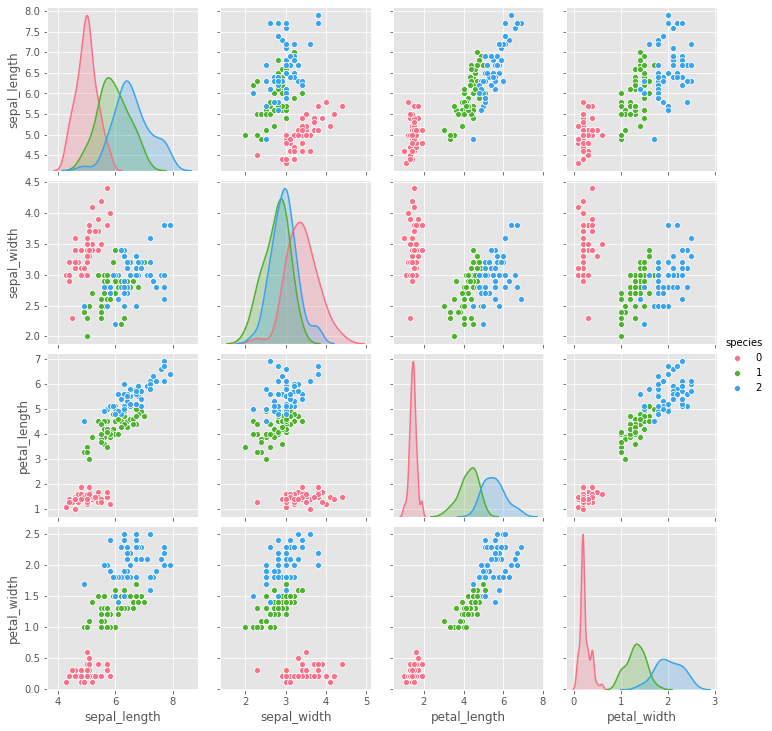

In [40]:
sns.pairplot(dataframe, hue='species', palette='husl')

Feature Creation

In [48]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

separated_features = dataframe.loc[:, features].values
print(separated_features)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [49]:
separated_target = dataframe.loc[:, 'species'].values
print(separated_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [50]:
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(separated_features)

print(scaled_features)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(scaled_features)

principalDf = pandas.DataFrame(data = principalComponents, columns = ['sepals', 'petals'])

finalDf = pandas.concat([principalDf, dataframe[['species']]], axis = 1)

print(principalDf)

       sepals    petals
0   -2.264542  0.505704
1   -2.086426 -0.655405
2   -2.367950 -0.318477
3   -2.304197 -0.575368
4   -2.388777  0.674767
..        ...       ...
145  1.870522  0.382822
146  1.558492 -0.905314
147  1.520845  0.266795
148  1.376391  1.016362
149  0.959299 -0.022284

[150 rows x 2 columns]


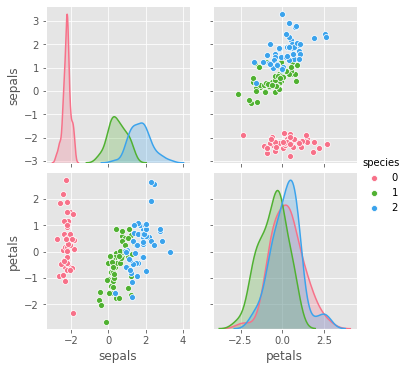

In [54]:
sns.pairplot(finalDf, hue='species', palette='husl')

In [55]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

Choice of Machine Learning Algorithm
Now, we have figured out that we should be using a Supervised Machine Learning Algorithm for defining our model. The next task is to figure out the Supervised Machine Learning Algorithm that would best suit our usecase and dataset for predicting possiblity of Liver Failures in individuals.

1. Linear Regression - This algorithm is used to predict a continuous value.
2. Logistic Regression - This algorithm is used to predict a binary classifier instead of a continuous variable.
3. Naive Bayes - This is a classification algorithm for binary (two-class) and multi-class classification problems.
4. Support Vector Machine - This is a binary classifier that analyze data used for classification and regression analysis.
5. Gradient Boosted Trees - This can also be used for regression and classification problems.

In [56]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression(solver = 'lbfgs')

logisticRegression.fit(principalComponents, separated_target)

LogisticRegression()

In [57]:
logisticRegression.predict(principalComponents[0:150])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1])

In [58]:
MLscore = logisticRegression.score(principalComponents, separated_target)
print(MLscore)

0.9333333333333333


In [65]:
!pip install tensorflow==2.2.0rc0

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 515.9 MB 39 kB/s s eta 0:00:01                      | 36.4 MB 11.7 MB/s eta 0:00:41/s eta 0:00:05��██████████████              | 290.2 MB 68.3 MB/s eta 0:00:04�███████████        | 387.8 MB 71.1 MB/s eta 0:00:02��███████████▋| 510.0 MB 82.2 MB/s eta 0:00:01��███████████▉| 512.9 MB 82.2 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 29.4 MB/s eta 0:00:01
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gas

In [66]:
import tensorflow as tf
if not tf.__version__ == '2.2.0-rc0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.2.0-rc0, or restart your Kernel (Kernel->Restart & Clear Output)')

In [67]:
!pip install keras

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [68]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
seed =7
np.random.seed(seed)
from tensorflow.keras.datasets import reuters


In [69]:
dataframe.shape

print(dataframe)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [70]:
dataset = dataframe.values

print(dataset)
dataset.shape

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

(150, 5)

In [71]:
# Split the dataset into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

print(Y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [73]:
from keras.models import Sequential
from keras.layers import Dense

from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [74]:
# Convert integers to dummy variables, hot encoded into a matrice

dummy_y = np_utils.to_categorical(Y)
print(dummy_y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [75]:
def iris_model():
    model = Sequential()
    
    # 4 features defines 4 as an input parameter into input layer 
    model.add(Dense(8, input_dim=4, kernel_initializer='normal', activation='relu'))

    # 3 classes defines output parameter in an output layer
    model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))
    
    # Compile model using Categorical Crossentropy as a loss function and Stochastic Gradient Descent as optimizer
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [76]:

# Create Keras clasifier to be used in sklearn evaluation process

estimator = KerasClassifier(build_fn=iris_model, epochs=200, batch_size=5, verbose=0)

In [77]:
# Evaluate the model using k-fold cross-validation 

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

score = cross_val_score(estimator, X, dummy_y, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (score.mean()*100, score.std()*100))

Baseline: 96.00% (5.33%)


In [78]:
# Unfold the model and explore the native .fit method performance on the fly (which was internally executed with KerasClassifier variable evocation) 

model = Sequential()
model.add(Dense(8, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
# Train the model

model.fit(X, dummy_y, epochs=60, batch_size=5)

Epoch 1/60
30/30 [==============================] - 0s 4ms/step - loss: 1.0955 - accuracy: 0.2133
Epoch 2/60
30/30 [==============================] - 0s 2ms/step - loss: 1.0934 - accuracy: 0.5333
Epoch 3/60
30/30 [==============================] - 0s 3ms/step - loss: 1.0909 - accuracy: 0.4400
Epoch 4/60
30/30 [==============================] - 0s 3ms/step - loss: 1.0877 - accuracy: 0.5733
Epoch 5/60
30/30 [==============================] - 0s 3ms/step - loss: 1.0839 - accuracy: 0.4600
Epoch 6/60
30/30 [==============================] - 0s 3ms/step - loss: 1.0787 - accuracy: 0.5067
Epoch 7/60
30/30 [==============================] - 0s 3ms/step - loss: 1.0720 - accuracy: 0.4467
Epoch 8/60
30/30 [==============================] - 0s 3ms/step - loss: 1.0634 - accuracy: 0.3533
Epoch 9/60
30/30 [==============================] - 0s 3ms/step - loss: 1.0524 - accuracy: 0.3867
Epoch 10/60
30/30 [==============================] - 0s 3ms/step - loss: 1.0385 - accuracy: 0.3467
Epoch 11/60
30/30 [

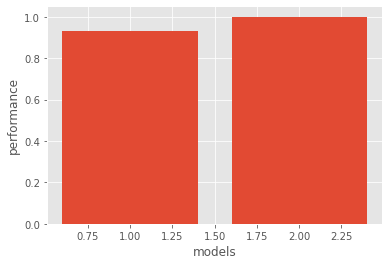

In [79]:

# Plot a histogram to compare the scores of performance out of ML & neural net algorithms

scores = [MLscore, score[0]]
plt.bar([1,2],scores,align='center')

plt.xlabel('models')
plt.ylabel('performance')
plt.show()